In [2]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt
 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 5s 1us/step


In [6]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
     

In [9]:

model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5


1500/1500 [==============================] - 33s 20ms/step - loss: 1.1568 - accuracy: 0.8363 - val_loss: 0.3586 - val_accuracy: 0.8783
Epoch 2/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2992 - accuracy: 0.8943 - val_loss: 0.3152 - val_accuracy: 0.8867
Epoch 3/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2507 - accuracy: 0.9089 - val_loss: 0.3270 - val_accuracy: 0.8852
Epoch 4/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2310 - accuracy: 0.9160 - val_loss: 0.3349 - val_accuracy: 0.8872
Epoch 5/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2143 - accuracy: 0.9223 - val_loss: 0.3405 - val_accuracy: 0.8866


In [10]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8856


In [13]:


predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 24ms/step


ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

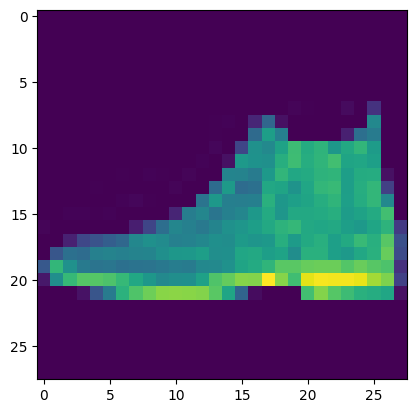

In [ ]:

labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
     
label = labels[np.argmax(predictions)]
print(label)
plt.imshow(test_x[:1][0])
plt.show

In [18]:
loss, acc = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {acc:.2f}")
print(f"Test Loss: {loss:.2f}")


313/313 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8856
Test Accuracy: 0.89
Test Loss: 0.36


Epoch 1/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1946 - accuracy: 0.9293 - val_loss: 0.3631 - val_accuracy: 0.8884
Epoch 2/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1805 - accuracy: 0.9337 - val_loss: 0.3502 - val_accuracy: 0.8943
Epoch 3/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1601 - accuracy: 0.9406 - val_loss: 0.3695 - val_accuracy: 0.8940
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1577 - accuracy: 0.9417 - val_loss: 0.4124 - val_accuracy: 0.8899
Epoch 5/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1453 - accuracy: 0.9467 - val_loss: 0.4404 - val_accuracy: 0.8902


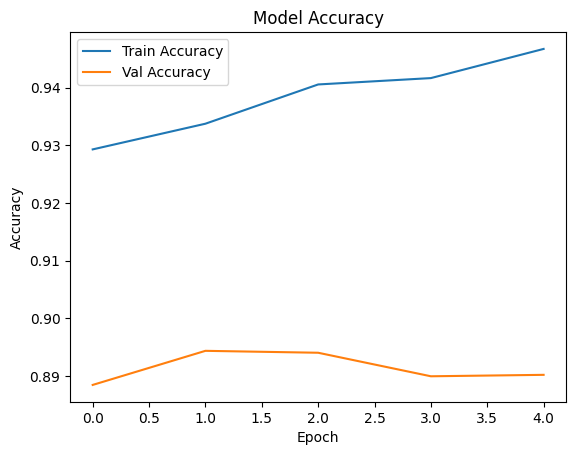

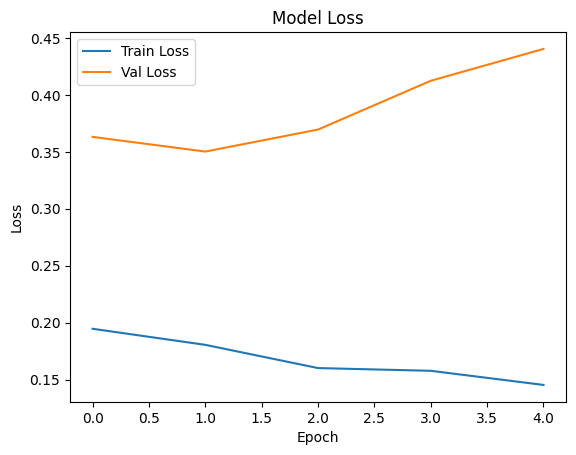

In [19]:
history = model.fit(train_x.astype(np.float32), train_y.astype(np.float32),epochs=5, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


313/313 [==============================] - 1s 4ms/step


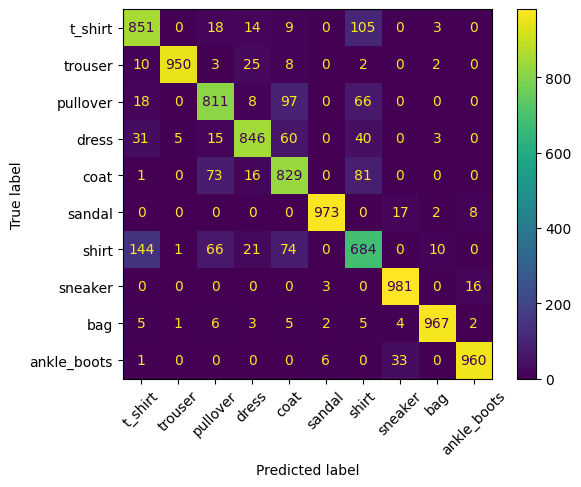

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted labels
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(test_y, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.show()


1/1 [==============================] - 0s 80ms/step


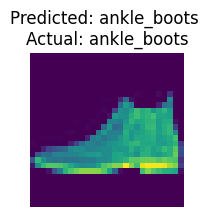

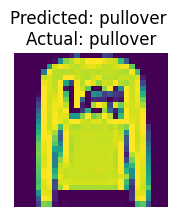

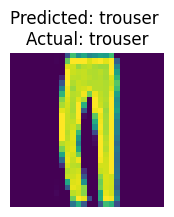

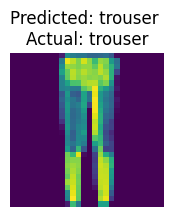

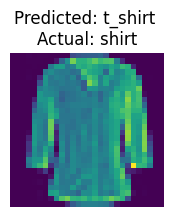

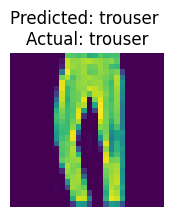

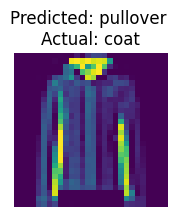

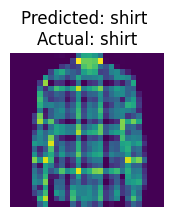

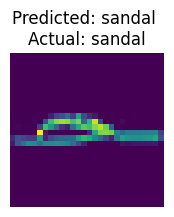

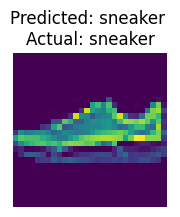

In [25]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

# Get predictions
predictions = model.predict(test_x[:10])
# Plot first 10 test images with predictions
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(test_x[i])
    plt.title(f"Predicted: {labels[np.argmax(predictions[i])]} \nActual: {labels[test_y[i]]}")
    plt.axis('off')
    plt.show()

